[YOLO ON COLAB](http://blog.ibanyez.info/download/B20190410T000000072.png)

## Mount Data from Google Drive 

 add this link to your google drive: https://drive.google.com/drive/folders/1tj4iJy_buQi9cngLg9zyEj4BXOX577mU?usp=sharing

In [1]:
## mount google drive 
from google.colab import drive
drive.mount('/content/gdrive')

!ls -la "/content/gdrive/My Drive/darknet"

## check cuda version 
!/usr/local/cuda/bin/nvcc --version

## unzip cuDNN for Nvidia deep learning 
!tar -xzvf gdrive/My\ Drive/darknet/cuDNN/cudnn-10.0-linux-x64-v7.5.0.56.tgz -C /usr/local/
!chmod a+r /usr/local/cuda/include/cudnn.h

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
total 75
drwx------ 2 root root  4096 Mar 15 11:01 backup
drwx------ 2 root root  4096 Mar 15 11:01 bin
drwx------ 2 root root  4096 Mar 15 11:01 cfg
drwx------ 2 root root  4096 Mar 15 11:01 check
-rw------- 1 root root   216 Mar 15 11:12 coco.data
-rw------- 1 root root   625 Mar 15 11:12 coco.names
drwx------ 2 root root  4096 Mar 15 11:01 cuDNN
drwx------ 2 root root  4096 Mar 15 11:01 img
drwx------ 2 root root  4096 Mar 15 11:01 _ipynb_checkpoints
drwx-

## Copy Darknet compiled version to Colab 

In [2]:
# Makes a dir for darknet and move there
!mkdir darknet
%cd darknet
# Copy the Darkent compiled version to the VM local drive
!cp /content/gdrive/My\ Drive/darknet/bin/darknet ./darknet
#!cp -R /content/gdrive/My\ Drive/darknet/bin/darknet ./
# Set execution permissions to Darknet
!chmod +x ./darknet

/content/darknet


## For testing darknet

In [5]:
!wget https://pjreddie.com/media/files/yolov3.weights
!wget https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg

--2020-03-17 19:16:49--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  1.15MB/s    in 2m 59s  

2020-03-17 19:19:48 (1.32 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]

--2020-03-17 19:19:49--  https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8342 (8.1K) [text/plain]
Saving to: ‘yolov3.cfg’

yolov3.cfg          100%[===================>]   8.15K  --.-KB/s    in 0s      

2020

In [7]:
!./darknet detector test /content/gdrive/My\ Drive/darknet/coco.data yolov3.cfg yolov3.weights test.jpg

./darknet: error while loading shared libraries: libcudart.so.10.0: cannot open shared object file: No such file or directory


## For training darknet 

In [0]:
# Train darknet 
#!./darknet detector train "/content/gdrive/My Drive/darknet/obj.data" "/content/gdrive/My Drive/darknet/cfg/yolov3.cfg" "/content/gdrive/My Drive/darknet/weights/darknet53.conv.74" -dont_show 

# Start training at the point where the last runtime finished
!./darknet detector train "/content/gdrive/My Drive/darknet/obj.data" "/content/gdrive/My Drive/darknet/cfg/yolov3.cfg" "/content/gdrive/My Drive/darknet/backup/yolov3_last.weights" -dont_show 

Streaming output truncated to the last 5000 lines.

 38614: 0.263972, 0.398630 avg loss, 0.001000 rate, 3.101973 seconds, 617824 images
Loaded: 0.000033 seconds

 38615: 0.104667, 0.369233 avg loss, 0.001000 rate, 3.094354 seconds, 617840 images
Loaded: 0.000044 seconds

 38616: 0.171126, 0.349423 avg loss, 0.001000 rate, 3.095377 seconds, 617856 images
Loaded: 0.000039 seconds

 38617: 0.308352, 0.345316 avg loss, 0.001000 rate, 3.097744 seconds, 617872 images
Loaded: 0.000031 seconds

 38618: 0.195327, 0.330317 avg loss, 0.001000 rate, 3.113701 seconds, 617888 images
Loaded: 0.000034 seconds

 38619: 0.147744, 0.312060 avg loss, 0.001000 rate, 3.102572 seconds, 617904 images
Loaded: 0.000035 seconds

 38620: 0.264319, 0.307286 avg loss, 0.001000 rate, 3.098796 seconds, 617920 images
Resizing
512 x 512 
 try to allocate additional workspace_size = 77.07 MB 
 CUDA allocate done! 
Loaded: 0.000041 seconds

 38621: 0.311601, 0.307717 avg loss, 0.001000 rate, 1.582357 seconds, 617936 imag

## Command test yolo 

In [0]:
!./darknet detector test /content/gdrive/My\ Drive/darknet/obj.data /content/gdrive/My\ Drive/darknet/cfg/yolov3.cfg /content/gdrive/My\ Drive/darknet/backup/yolov3_last.weights /content/gdrive/My\ Drive/darknet/img/img_655.jpg
#!./darknet detector test /content/gdrive/My\ Drive/darknet/obj.data /content/gdrive/My\ Drive/darknet/cfg/yolov3.cfg /content/gdrive/My\ Drive/darknet/backup/yolov3_last.weights /content/gdrive/My\ Drive/darknet/test/test_1.jpg


## Code for using YOLO with openCV 

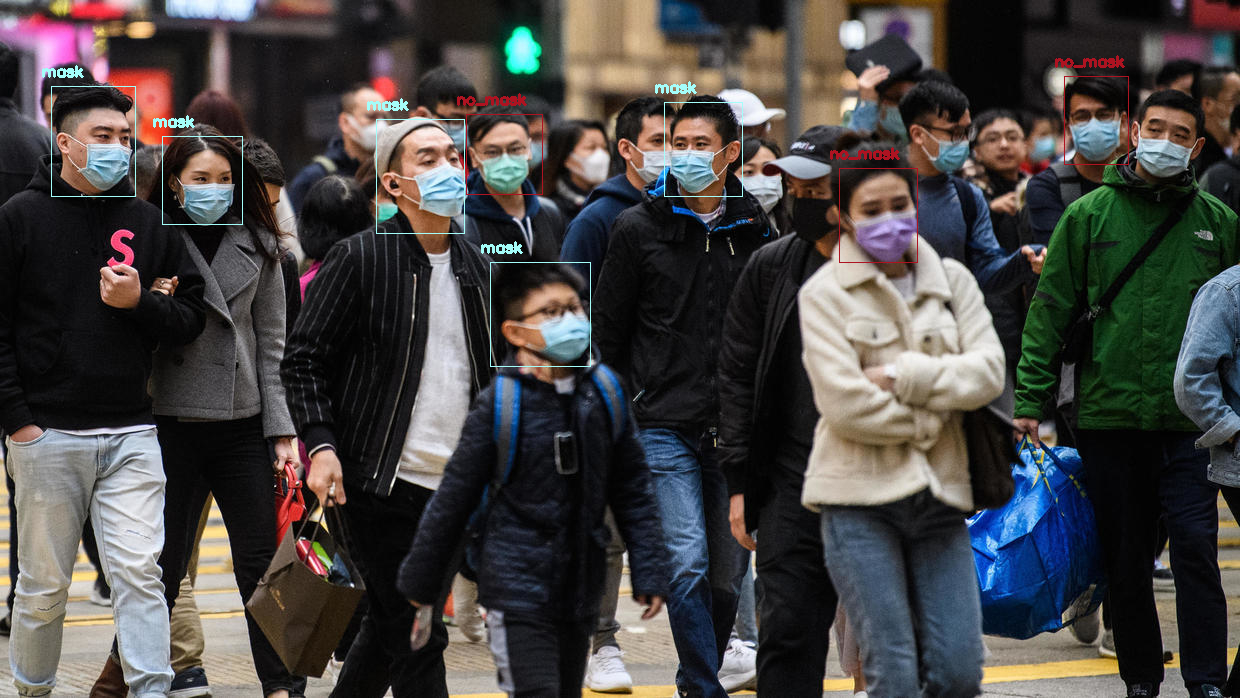

In [19]:
import cv2
import numpy as np

def get_output_layers(net):    
    layer_names = net.getLayerNames()    
    output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
    return output_layers


def draw_prediction(img, class_id, confidence, x, y, x_plus_w, y_plus_h):
    label = str(classes[class_id])
    color = COLORS[class_id]
    cv2.rectangle(img, (x,y), (x_plus_w,y_plus_h), color, 1)
    cv2.putText(img, label, (x-10,y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

##  read input image
image = cv2.imread("/content/gdrive/My Drive/darknet/img/img_650.jpg")
#image = cv2.imread("/content/gdrive/My Drive/darknet/test/test_4.jpg")

Width = image.shape[1]
Height = image.shape[0]

## read object class name 
classes = None
with open("/content/gdrive/My Drive/darknet/obj.names", 'r') as f:
    classes = [line.strip() for line in f.readlines()]

##  random boundingbox colors for each object label  
COLORS = np.random.uniform(0, 255, size=(len(classes), 3))

## read yolo's weights
net = cv2.dnn.readNet("/content/gdrive/My Drive/darknet/backup/yolov3_last.weights", "/content/gdrive/My Drive/darknet/cfg/yolov3.cfg")

##  preprocessing image 
blob = cv2.dnn.blobFromImage(image, 0.00392 , (608, 608), True, crop=False)
net.setInput(blob)

## object detection process 
outs = net.forward(get_output_layers(net))

class_ids = []
confidences = []
boxes = []
conf_threshold = 0.5                   ### confidence threshold 
nms_threshold = 0.4                    ### non maximum supression threshold 

for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > conf_threshold:
            center_x = int(detection[0] * Width)
            center_y = int(detection[1] * Height)
            w = int(detection[2] * Width)
            h = int(detection[3] * Height)
            x = center_x - w / 2
            y = center_y - h / 2
            class_ids.append(class_id)
            confidences.append(float(confidence))
            boxes.append([x, y, w, h])


indices = cv2.dnn.NMSBoxes(boxes, confidences, conf_threshold, nms_threshold)

for i in indices:
    i = i[0]
    box = boxes[i]
    x = box[0] 
    y = box[1]
    w = box[2]
    h = box[3]
    draw_prediction(image, class_ids[i], confidences[i], round(x), round(y), round(x+w), round(y+h))

################################## detected image ###############################################
from google.colab.patches import cv2_imshow
cv2_imshow(image)